# 9. 이미지 분류

## 1. 딥러닝

![](./de_01.png)
- 출력의 경우 이진분류인지 다중분류인지에 따라 결과가 달라짐

- 예측값과 실제값을 손실함수를 통해서 오차를 측정하고 경사하강법과 같은 최적화 알고리즘을 최적의 가중치를 찾고 역전파를 통해 각 레이어마다 가중치를 업데이트해나가면서 반복하는것이 딥러닝의 학습 과정

![](./de_02.png)

딥러닝은 오버피팅이 자주 발생함. 학습을 하면 할수록 오차가 줄어듬.

train data는 학습을하면 할수록 줄어드는데 이것은 이 데이터에 최적화되게 모델이 만들어지고 있다

validation은 어느 구간이 되면 validation 오차가 늘어나는데 이부분 부터 오차가 늘어나는 부분이 오버피팅이 발생하는 부분. 딥러닝에서는 이부분을 잘 찾아 내어 종료를 잘 해주어야 함

![](./de_03.png)



## 2. 이미지 분류

![](./de_04.png)

![](./de_05.png)

![](./de_06.png)

- 시퀀셜 모델은 착착 쌓아서 만든다. flatten은 인풋이 들어왔을때 데이터의 출력을 펼쳐주는 역할

![](./de_07.png)

- Dense 케라스의 Dense 클래스는 뉴런의 입력과 출력을 연결해주는 역할을 합니다. 예를 들어 입력 뉴런이 128(완전 전개 레이어), 출력 뉴런이 8개라면 총 연결선은 128 x 10 = 1280개 입니다. 각 연결선은 가중치(weight) 를 포함하고 있는데 뉴런의 시냅스처럼 입력 값에 대한 연결 강도와 같습니다.

가중치가 높을 수록 입력값이 출력값에 미치는 영향이 커지고, 낮을 수록 영향이 작아집니다. 성별을 판단하는 문제에서, 뉴런의 출력값이 성별이고, 입력값이 머리길이, 키, 혈액형 등이라고 할 때, 머리길이의 가중치가 높고, 키의 가중치는 중간, 혈액형의 가중치는 가장 낮을 것입니다. 딥러닝 학습과정에서는 이러한 가중치들을 계속 조정을 하며 최적값을 찾아나갑니다.

Sequential Activation의 종류  - hidden layer(중간)에는 relu를 사용하는것이 일반적

- softmax : 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수. 출력값들을 0~1 사이의 값으로 만들어주고, 모든 출력값들의 합이 1이 되도록 만들어줍니다. 이 특성으로 인해 출력값들을 확률로 해석할 수 있습니다. (가장 높은 확률값을 선택하게 됨)
- sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수. 출력값을 0~1 사이의 값으로 만들어주고, 0.5를 기준으로 0과 1로 분류할 수 있습니다.
- relu : 은닉층에 주로 사용되는 활성화 함수. 입력값이 0보다 작으면 0으로, 0보다 크면 입력값을 그대로 출력합니다.
- tanh : 은닉층에 주로 사용되는 활성화 함수. sigmoid와 비슷하지만, 출력값의 범위가 -1 ~ 1 입니다.
- linear : 입력값을 그대로 출력합니다.
- softmax, sigmoid, tanh는 비선형 함수입니다. 비선형 함수를 사용하지 않으면 딥러닝 층을 여러개 쌓는 의미가 없어지기 때문에, 딥러닝에서는 주로 비선형 함수를 사용합니다.합이 1인 확률로 변환해줌
- linear는 선형 함수입니다. 선형 함수는 딥러닝 층을 여러개 쌓는 의미가 없습니다. 따라서, 딥러닝에서는 주로 비선형 함수를 사용합니다.

![](./de_08.png)

- 옵티마이저는 adam을 많이 쓴다.

- 다중분류 모델에서는 sparse_categorical_crossentropy를 사용한다. 이진분류 모델에서는 binary_crossentropy를 사용한다.

- metrics는 평가지표를 의미한다. accuracy를 많이 사용한다.

![](./de_09.png)

- 컴파일이 끝나고 나면 모델을 학습함.

- epochs는 학습을 몇번 할지를 의미한다. batch_size는 한번에 몇개의 데이터를 학습할지를 의미한다.

In [1]:
#mnist 데이터를 이용한 이미지 분류
#라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt

2023-07-19 10:52:20.039456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#version 확인
tf.__version__

'2.13.0'

In [3]:
#mnist 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
#데이터 크기
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
#데이터 확인
import numpy as np
np.set_printoptions(linewidth=120)
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

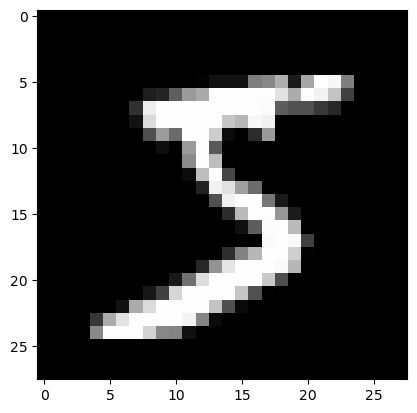

In [6]:
#데이터 확인 (이미지)
plt.imshow(x_train[0], cmap='gray')

In [11]:
# 모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [12]:
#모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#모델 학습
history = model.fit(x_train, y_train, epochs=5)
# 총 60000개의 데이터를 5번 학습. epoch 당 1875개의 데이터를 학습하는 이유는 batch_size가 32이기 때문입니다. 60000 / 32 = 1875

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6816 - accuracy: 0.8942
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3446 - accuracy: 0.9287
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2726 - accuracy: 0.9388
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2437 - accuracy: 0.9437
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2273 - accuracy: 0.9478


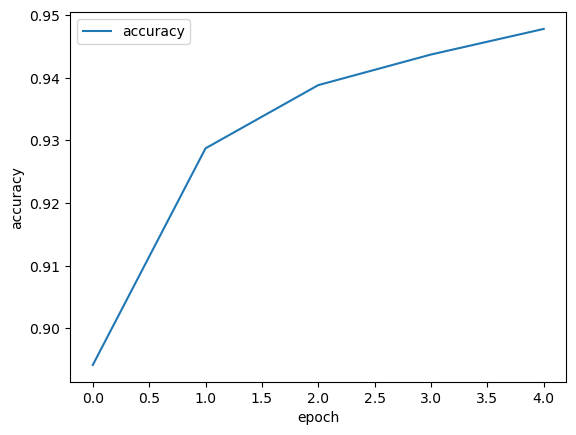

In [15]:
#학습정확도(epoch에 따른 accuracy변화)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

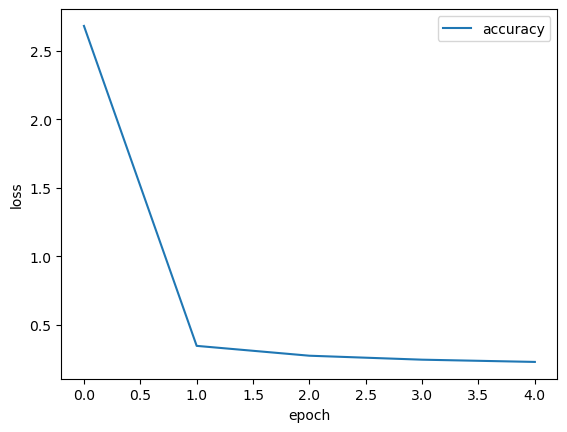

In [16]:
#loss
plt.plot(history.history['loss'], label='accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

fashion_mnist 데이터를 이용한 이미지 분류

In [17]:
#라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [18]:
#데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [19]:
#정규화(0~1사이의 값으로 만들어줌), 모델 성능 향상됨
x_train, x_test = x_train / 255.0, x_test / 255.0

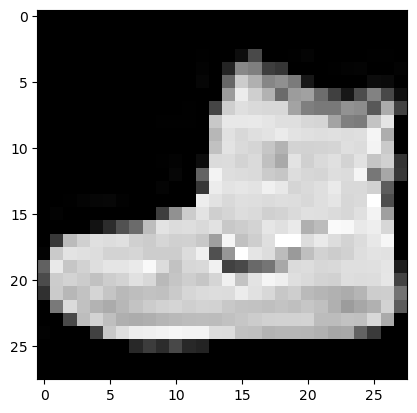

In [20]:
#데이터 확인(이미지)
plt.imshow(x_train[0], cmap='gray')

In [21]:
y_train[0]

9

In [22]:
#9라고 나온 결과값이 어떤물건인지 lable 확인
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[0]])

Ankle boot


T-shirt/top


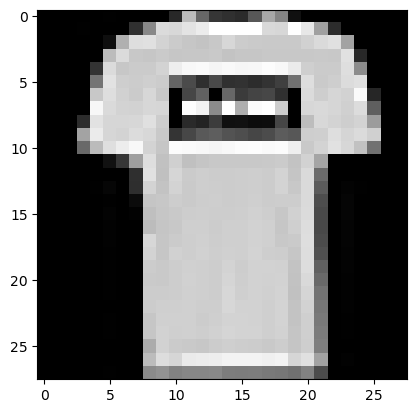

In [23]:
#데이터 확인(이미지,레이블)
print(class_names[y_train[1]])
plt.imshow(x_train[1], cmap='gray')

In [24]:
#모델(시퀀셜모델, Drop 추가 - 랜덤으로 생략, % 설정 가능)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
#컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
#학습 case1. validation_split을 통해서 알아서 20%를 검증데이터로 사용
history = model.fit(x_train, y_train,validation_split=0.2 , epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5509 - accuracy: 0.8049 - val_loss: 0.4107 - val_accuracy: 0.8472
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4085 - accuracy: 0.8523 - val_loss: 0.3902 - val_accuracy: 0.8542
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3745 - accuracy: 0.8637 - val_loss: 0.3604 - val_accuracy: 0.8684
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3531 - accuracy: 0.8690 - val_loss: 0.3372 - val_accuracy: 0.8752
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3360 - accuracy: 0.8767 - val_loss: 0.3317 - val_accuracy: 0.8788


In [26]:
#학습 case2. validation_data를 지정해서 사용
history = model.fit(x_train, y_train,validation_data=(x_test, y_test) , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3318 - accuracy: 0.8762 - val_loss: 0.3719 - val_accuracy: 0.8635
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3185 - accuracy: 0.8823 - val_loss: 0.3573 - val_accuracy: 0.8684
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3076 - accuracy: 0.8854 - val_loss: 0.3543 - val_accuracy: 0.8701
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8908 - val_loss: 0.3508 - val_accuracy: 0.8750
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.8916 - val_loss: 0.3290 - val_accuracy: 0.8812
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.8944 - val_loss: 0.3441 - val_accuracy: 0.8792
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2777 - accuracy: 0.8958 - val_loss: 0.3440 - val_accuracy:

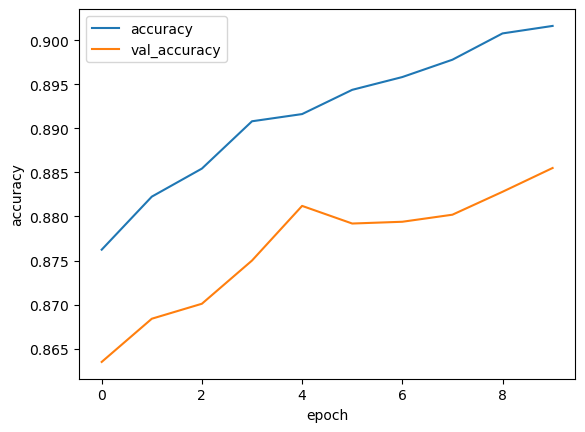

In [27]:
#학습정확도
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

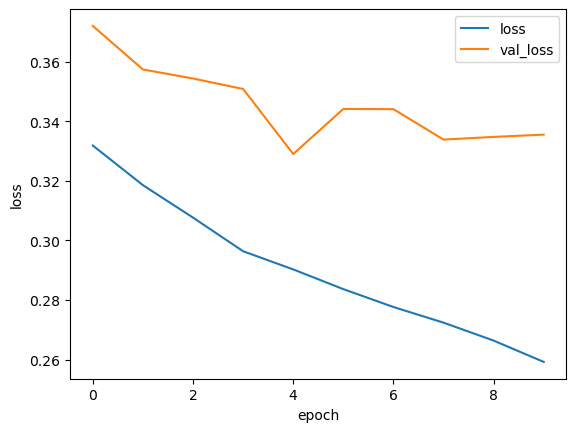

In [28]:
#loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [29]:
#예측 - 1번째 결과 확률값중 10개중 가장 큰것을 찾아야 함
pred = model.predict(x_test)
pred[1]

313/313 [==============================] - 0s 1ms/step


array([1.0432060e-05, 6.3521023e-16, 9.9875432e-01, 4.5804985e-11, 4.5336699e-04, 7.0364223e-16, 7.8200287e-04,
       1.1709739e-19, 7.5119133e-11, 1.8192474e-17], dtype=float32)

In [30]:
# 가장 높은 값 찾기(np.argmax()는 가장 큰 값의 인덱스를 찾아줌)
np.argmax(pred[1])

2

In [31]:
#예측값 확인
class_names[np.argmax(pred[1])]

'Pullover'

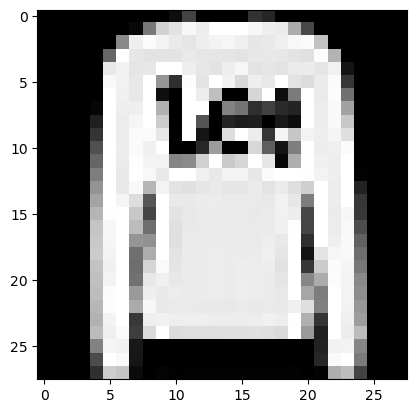

In [32]:
#이미지 확인
plt.imshow(x_test[1], cmap='gray')

## 03. CNN(Convolutional Neural Network)을 활용한 이미지 분류

![](./de_10.png)

![](./de_11.png)

이미지와 필터의 연산을 통해서 데이터를 새롭게 구성함. 커널(필터)에 따라 데이터가 변경됨

풀링레이어 중 맥스 풀링은 가장 큰 값만 뽑아서 데이터를 구성함. 특징을 추출한 피처맵 구성

In [33]:
#라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [34]:
#데이터 불러오기
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
#shape 변경
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [36]:
#정규화(0~1사이의 값으로 만들어줌), 모델 성능 향상됨
x_train, x_test = x_train / 255.0, x_test / 255.0

In [37]:
#모델
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [39]:
#학습
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4882 - accuracy: 0.8233 - val_loss: 0.3666 - val_accuracy: 0.8669
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3278 - accuracy: 0.8819 - val_loss: 0.3231 - val_accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2830 - accuracy: 0.8967 - val_loss: 0.3075 - val_accuracy: 0.8882
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2497 - accuracy: 0.9082 - val_loss: 0.2810 - val_accuracy: 0.8987
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2254 - accuracy: 0.9164 - val_loss: 0.2610 - val_accuracy: 0.9042
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2038 - accuracy: 0.9242 - val_loss: 0.2574 - val_accuracy: 0.9088
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1851 - accuracy: 0.9304 - val_loss: 0.2732 -

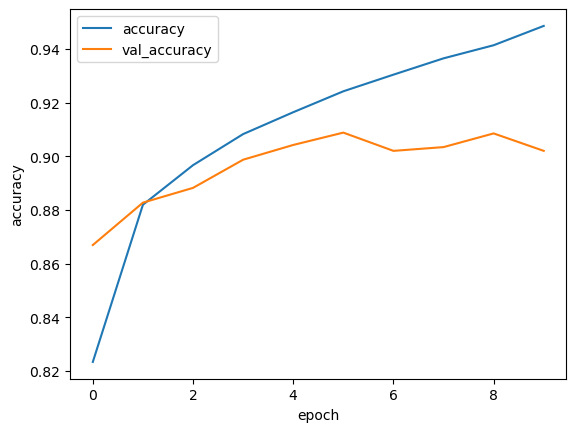

In [40]:
#학습정확도
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()